In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\Research\\Models'

In [3]:
pd.set_option("display.max_columns", None)

# Data Loading

In [4]:
data_initial=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/Obtained_Data/second_scenario_group.csv",dtype={"event_name_1": object,
                                                                                         "event_type_1": object,
                                                                                         "event_name_2": object,
                                                                                         "event_type_2": object,},index_col=0)

In [5]:
data_initial["date"]=pd.to_datetime(data_initial["date"])

In [6]:
data_initial.event_name_1.value_counts()

LentStart              18
Purim End              18
PresidentsDay          18
SuperBowl              18
LentWeek2              18
ValentinesDay          18
StPatricksDay          18
Halloween              15
NBAFinalsStart         15
LaborDay               15
Ramadan starts         15
MemorialDay            15
VeteransDay            15
EidAlAdha              15
ColumbusDay            15
MartinLutherKingDay    15
IndependenceDay        15
NBAFinalsEnd           15
Eid al-Fitr            15
Mother's day           15
NewYear                15
Chanukah End           15
OrthodoxChristmas      15
Thanksgiving           15
Pesach End             15
Christmas              15
Easter                 15
OrthodoxEaster         12
Father's day           12
Cinco De Mayo          12
Name: event_name_1, dtype: int64

In [7]:
data_initial.head()

,store_id,date,Total_sales,Sales,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,TX_1,2011-01-29,1124,58,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,TX_1,2011-01-30,1124,62,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,TX_1,2011-01-31,1124,41,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,TX_1,2011-02-01,1124,46,NaN,NaN,NaN,NaN,1,1,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,TX_1,2011-02-02,1124,28,NaN,NaN,NaN,NaN,1,0,1,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Event Conversion

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
hot_encoder=OneHotEncoder()

## Event

In [10]:
data_initial.drop(["event_name_1", "event_name_2", "event_type_2", "CA", "TX", "WI"], axis=1, inplace=True)

In [11]:
data_initial[data_initial["event_type_1"].isna()]["event_type_1"]=0
data_initial["event_type_1"]=data_initial["event_type_1"].astype(str)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
encoded_event=hot_encoder.fit_transform(data_initial[["event_type_1"]])
array_event=encoded_event.toarray()

In [13]:
hot_encoder.categories_

[array(['Cultural', 'National', 'Religious', 'Sporting', 'nan'],
       dtype=object)]

In [14]:
event_df=pd.DataFrame(array_event,columns=["Cultural", "National", "Religious", "Sporting", 'nan'])

## Store Id

In [15]:
encoded_store=hot_encoder.fit_transform(data_initial[["store_id"]])
array_store=encoded_store.toarray()

In [16]:
hot_encoder.categories_

[array(['TX_1', 'TX_2', 'TX_3'], dtype=object)]

In [17]:
store_df=pd.DataFrame(array_store, columns=['TX_1', 'TX_2', 'TX_3'])

In [18]:
frames=[data_initial, event_df, store_df]
data=pd.concat(frames, axis=1)

In [19]:
data.drop(["event_type_1", "nan", "Total_sales", "store_id"], axis=1, inplace=True)

In [20]:
data.head()

,date,Sales,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3
0,2011-01-29,58,0,0,0,5.959714,5.05,4.094626,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2011-01-30,62,0,0,0,5.959714,5.05,4.094626,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2011-01-31,41,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2011-02-01,46,1,1,0,5.959714,5.05,4.094626,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2011-02-02,28,1,0,1,5.959714,5.05,4.094626,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
data.describe()

,Sales,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3
count,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000
mean,60.678690,0.329326,0.329326,0.329326,6.364913,5.284278,4.713428,0.142708,0.142708,0.143231,0.143231,0.142708,0.142708,0.142708,0.082593,0.088866,0.097229,0.090957,0.081025,0.078411,0.081025,0.081025,0.078411,0.081025,0.078411,0.081025,0.176163,0.191323,0.190800,0.190800,0.190800,0.060115,0.018296,0.026660,0.027182,0.008364,0.333333,0.333333,0.333333
std,18.630619,0.470009,0.470009,0.470009,0.431139,0.298365,0.662430,0.349805,0.349805,0.350338,0.350338,0.349805,0.349805,0.349805,0.275290,0.284575,0.296296,0.287572,0.272897,0.268840,0.272897,0.272897,0.268840,0.272897,0.268840,0.272897,0.380992,0.393377,0.392966,0.392966,0.392966,0.237720,0.134031,0.161101,0.162629,0.091079,0.471446,0.471446,0.471446
min,0.000000,0.000000,0.000000,0.000000,5.446415,4.480000,3.428941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,0.000000,6.039063,4.970000,4.095943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,0.000000,0.000000,0.000000,6.398908,5.360000,4.514425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,1.000000,1.000000,1.000000,6.798731,5.480000,5.219345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,183.000000,1.000000,1.000000,1.000000,7.040315,5.825000,5.800847,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
path=r'D:/Datasets/m5-forecasting-accuracy/Obtained_Data/'

In [24]:
data.to_csv(path+'second_scenario_group_processed.csv')

# Performance Function

In [21]:
def performance_list(ID,actual,forecast):
    name=ID
    n=len(actual)
    error=actual-forecast
    mean=np.mean(actual)
    sd=actual.std()
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=np.sqrt(sum(error**2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    result_df=pd.DataFrame({"Name" :       name ,
                            "# of inst":       n,
                            "Mean":         mean,
                            "Standard Dev.":  sd, 
                            "FBias":       FBias, 
                            "MPE":           MPE, 
                            "MAPE":         MAPE,                                      
                            "RMSE":         RMSE, 
                            "MAD":           MAD, 
                            "WMAPE":      WMAPE}, index=[0])
    return(result_df)

# Scaler

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()

In [24]:
data_scale=data[:]

In [25]:
data_scale[data_scale.columns[1:]]=scaler.fit_transform(data_scale[data_scale.columns[1:]])

In [26]:
data_scale["date"]=data["date"]

In [27]:
data=data_scale

### Train & Test

In [28]:
import datetime

In [29]:
# train=data[data["date"]<((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]

In [30]:
# test=data[data["date"]>=((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]
# test.reset_index(drop=True, inplace=True)

In [31]:
specific_date=data["date"].max()-datetime.timedelta(days=28)

In [32]:
train=data[data["date"]<=specific_date]

In [33]:
test=data[data["date"]>specific_date]
test.reset_index(drop=True, inplace=True)

### Date and Customer Drop

In [34]:
train=train.drop(["date"], axis=1)
X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]

In [35]:
test=test.drop(["date"], axis=1)
X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]

# Linear Regression-Elastic Net

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
from sklearn.linear_model import ElasticNet

### Grid

In [38]:
elastic_net_model = ElasticNet()

In [39]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [40]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [41]:
elastic_net.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [42]:
elastic_predictions=elastic_net.predict(X_test)

In [43]:
elastic_net.predict(X_train).shape

(5655,)

In [44]:
performance_list("Control", elastic_net.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,5655,0.330107,5.551115e-17,-1.264406e-16,1.235381e-16,0.242175,0.001344,0.079944,0.242175


In [45]:
res_elastic=performance_list("Elastic Net Performance", elastic_predictions, y_test)

In [46]:
res_elastic

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,84,0.330107,0.0,-0.30439,-0.30439,0.3363,0.015599,0.111015,0.3363


# Support Vector Machines

### Grid

In [47]:
elastic_net_model = ElasticNet()

In [48]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [49]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

### Linear

In [50]:
from sklearn.svm import LinearSVR

In [51]:
sv_regressor=LinearSVR()

### Grid

In [52]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [53]:
sv_regressor = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True)

In [54]:
sv_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

### Poly with Kernel

In [55]:
from sklearn.svm import SVR

### Grid

In [56]:
param_grid_svm_poly=[
    {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [57]:
sv_regressor_poly=SVR(kernel="poly")

In [58]:
sv_regressor_poly = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [59]:
sv_regressor_poly.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [60]:
sv_regressor_poly.best_estimator_

SVR(degree=2, epsilon=0.05, kernel='poly')

### Predictions

In [61]:
svm_predictions_linear=sv_regressor.predict(X_test)

In [62]:
res_svr_linear=performance_list("Support Vector Regressor Linear Performance", svm_predictions_linear, y_test)

In [63]:
svm_predictions_poly=sv_regressor_poly.predict(X_test)

In [64]:
res_svr_poly=performance_list("Support Vector Regressor Polynomial Performance", svm_predictions_poly, y_test)

In [65]:
performance_list("Control", sv_regressor.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,5655,0.272418,0.068856,-0.211767,-0.264871,0.378191,0.001602,0.093754,0.344154


In [66]:
performance_list("Control", sv_regressor_poly.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,5655,0.327628,0.075964,-0.007566,-0.005245,0.159458,0.000866,0.050238,0.153339


### Results

In [67]:
res_svr_linear

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Linear Performance,84,0.284199,0.05107,-0.515093,-0.554298,0.575486,0.019665,0.153995,0.541856


In [68]:
res_svr_poly

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Polynomial Performance,84,0.378289,0.044932,-0.138251,-0.139965,0.214724,0.011323,0.081126,0.214455


# Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

### Grid

In [70]:
param_grid=[
    {"n_estimators":[200,300,500], "max_features":[8,12,16],
     "bootstrap":[False,True]}
]

In [71]:
random_reg=RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_reg, param_grid=param_grid,
                 cv=10,return_train_score=True)

### Predictions

In [72]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [8, 12, 16],
                          'n_estimators': [200, 300, 500]}],
             return_train_score=True)

In [73]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 200}

### Results

In [74]:
rf_predictions=grid_search.predict(X_test)

In [75]:
res_rf=performance_list("Random Forest Performance", rf_predictions, y_test)

In [76]:
res_rf

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance,84,0.39136,0.064737,-0.100237,-0.107389,0.189671,0.010373,0.072641,0.185611


In [77]:
performance_list("Control", grid_search.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,5655,0.33018,0.085566,0.000223,0.010045,0.077238,0.000436,0.02431,0.073626


# Feature Extraction

In [78]:
from sklearn.tree import DecisionTreeRegressor

### Train Node Selection

In [79]:
estimator = DecisionTreeRegressor(min_samples_leaf=10, max_depth=5)
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [80]:
on_leaf = estimator.apply(X_train)

In [81]:
X_train_ext=X_train[:]

In [82]:
X_train_ext["Node"] = on_leaf.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
X_train_ext

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node
0,0.0,0.0,0.0,0.322040,0.423792,0.280654,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29
1,0.0,0.0,0.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15
2,0.0,0.0,0.0,0.322040,0.423792,0.280654,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8
3,1.0,1.0,0.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8
4,1.0,0.0,1.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5706,0.0,0.0,0.0,0.639752,0.736059,0.788259,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34
5707,0.0,0.0,0.0,0.639752,0.736059,0.788259,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34
5708,0.0,0.0,0.0,0.639752,0.736059,0.788259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35
5709,0.0,0.0,0.0,0.639752,0.736059,0.788259,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,41


### Test Node Selection

In [84]:
on_leaf_test = estimator.apply(X_test)

In [85]:
X_test_ext=X_test[:]

In [86]:
X_test_ext["Node"] = on_leaf_test.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
X_test_ext

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node
0,0.0,0.0,0.0,0.359230,0.297398,0.410982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34
1,0.0,0.0,0.0,0.359230,0.297398,0.410982,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34
2,0.0,0.0,0.0,0.359230,0.297398,0.410982,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34
3,0.0,0.0,0.0,0.359230,0.297398,0.410982,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34
4,1.0,1.0,0.0,0.359230,0.297398,0.410982,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,0.0,0.639752,0.736059,0.788259,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34
80,0.0,0.0,0.0,0.639752,0.736059,0.788259,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34
81,0.0,0.0,0.0,0.639752,0.736059,0.788259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35
82,0.0,0.0,0.0,0.638488,0.736059,0.787349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,41


### Feature Adding

Ma=1 kullanıldı daha hızlı bir şekilde anlaşılması için

In [88]:
Xframes_feature=[X_train_ext, X_test_ext]
yframes_feature=[pd.DataFrame(y_train), pd.DataFrame(y_test)]
X_concat=pd.concat(Xframes_feature)
X_concat.reset_index(inplace=True, drop=True)
Y_concat=pd.concat(yframes_feature)
Y_concat.reset_index(inplace=True, drop=True)
final_frame=[X_concat, Y_concat]
concated_df=pd.concat(final_frame, axis=1)

In [89]:
concated_df.rename({0:'Sales'}, axis=1, inplace=True)

In [90]:
concated_df["new_feature"] = concated_df.groupby(["Node"])["Sales"].shift(+1)

In [91]:
X_test_new=concated_df.iloc[len(X_train):].drop(["Sales","Node"], axis=1)

y_test_new=concated_df.iloc[len(X_train):]["Sales"]

In [92]:
train_new=concated_df.iloc[:len(X_train)]

In [93]:
train_new.dropna(inplace=True);
train_new.reset_index(drop=True, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
X_train_new=train_new.drop(["Sales","Node"], axis=1)

y_train_new=train_new["Sales"]

## Short Prediction Quality

# Linear Regression-Elastic Net

### Grid

In [95]:
elastic_net_model_new = ElasticNet()

In [96]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [97]:
elastic_net_new = GridSearchCV(estimator=elastic_net_model_new, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [98]:
elastic_net_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [99]:
elastic_predictions_new=elastic_net_new.predict(X_test_new)

In [100]:
res_elastic_new=performance_list("Elastic Net Performance with Feature Extraction", elastic_predictions_new, y_test_new)

In [101]:
res_elastic_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance with Feature Extraction,84,0.329971,5.551115e-17,-0.304925,-0.304925,0.336682,0.015609,0.111096,0.336682


### SVM

#### Linear

In [102]:
sv_regressor_new=LinearSVR()

### Grid

In [103]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [104]:
sv_regressor_new = GridSearchCV(estimator=sv_regressor_new, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True,)

In [105]:
sv_regressor_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

In [106]:
svm_predictions_new=sv_regressor_new.predict(X_test_new)

res_svr_new=performance_list("SVR Linear Performance with Feature Extraction", 
                                svm_predictions_new, y_test_new)

res_svr_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Linear Performance with Feature Extraction,84,0.288279,0.050904,-0.493651,-0.529446,0.551841,0.01924,0.150363,0.52159


## Poly

### Grid

In [107]:
param_grid_svm_poly=[
    {"degree":[2,3,4], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [108]:
sv_regressor_poly_new=SVR(kernel="poly")

In [109]:
sv_regressor_poly_new = GridSearchCV(estimator=sv_regressor_poly_new, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [110]:
sv_regressor_poly_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3, 4],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [111]:
sv_regressor_poly_new.best_estimator_

SVR(degree=2, epsilon=0.05, kernel='poly')

In [112]:
svm_predictions_poly_new=sv_regressor_poly_new.predict(X_test_new)

res_svr_poly_new=performance_list("SVR Polynomail Performance with Feature Extraction", 
                                svm_predictions_poly_new, y_test_new)

res_svr_poly_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Polynomail Performance with Feature Extrac...,84,0.378222,0.045126,-0.138454,-0.139659,0.213096,0.011231,0.08054,0.212945


### Random Forest

In [113]:
random_reg_new=RandomForestRegressor()
grid_search_new = GridSearchCV(estimator=random_reg_new, param_grid=param_grid,
                 cv=10,return_train_score=True)

In [114]:
grid_search_new.fit(X_train_new, y_train_new)

grid_search_new.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 500}

In [115]:
rf_predictions_new=grid_search_new.predict(X_test_new)

res_rf_new=performance_list("Random Forest Performance with Feature Extraction", rf_predictions_new, y_test_new)

res_rf_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance with Feature Extraction,84,0.389131,0.056156,-0.106537,-0.106542,0.177166,0.009875,0.068605,0.176304


# General Result Table

In [116]:
pd.options.display.float_format = '{:,.8f}'.format

In [117]:
result_frames=[res_elastic,res_svr_linear,res_svr_poly,res_rf, res_elastic_new,res_svr_new,res_svr_poly_new,res_rf_new]
total_result=pd.concat(result_frames)
total_result.reset_index(drop=True, inplace=True)

In [118]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,84,0.33010683,0.00000000,-0.30439012,-0.30439012,0.33630022,0.01559867,0.11101500,0.33630022
1,Support Vector Regressor Linear Performance,84,0.28419908,0.05107036,-0.51509315,-0.55429816,0.57548589,0.01966509,0.15399497,0.54185596
2,Support Vector Regressor Polynomial Performance,84,0.37828913,0.04493198,-0.13825128,-0.13996477,0.21472412,0.01132279,0.08112598,0.21445497
3,Random Forest Performance,84,0.39135953,0.06473736,-0.10023661,-0.10738916,0.18967113,0.01037278,0.07264063,0.18561100
4,Elastic Net Performance with Feature Extraction,84,0.32997147,0.00000000,-0.30492518,-0.30492518,0.33668233,0.01560905,0.11109556,0.33668233
5,SVR Linear Performance with Feature Extraction,84,0.28827899,0.05090403,-0.49365060,-0.52944647,0.55184132,0.01923961,0.15036342,0.52158994
6,SVR Polynomail Performance with Feature Extrac...,84,0.37822180,0.04512636,-0.13845388,-0.13965860,0.21309591,0.01123106,0.08054042,0.21294494
7,Random Forest Performance with Feature Extraction,84,0.38913137,0.05615629,-0.10653654,-0.10654231,0.17716641,0.00987470,0.06860534,0.17630381


## RFOverfitting

In [119]:
rf_control=grid_search.predict(X_train)

performance_list("RF Performance without Feature Extraction",rf_control, y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,5655,0.33018042,0.08556631,0.00022291,0.01004480,0.07723788,0.00043606,0.02430995,0.07362626


In [120]:
rf_control=grid_search.predict(X_test)

performance_list("RF Performance without Feature Extraction",rf_control, y_test)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,84,0.39135953,0.06473736,-0.10023661,-0.10738916,0.18967113,0.01037278,0.07264063,0.18561100


In [121]:
rf_control_feature=grid_search_new.predict(X_train_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_train_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,5624,0.33019739,0.08503205,0.00068418,0.01260873,0.06626199,0.00035889,0.02064138,0.06251226


In [122]:
rf_control_feature=grid_search_new.predict(X_test_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_test_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,84,0.38913137,0.05615629,-0.10653654,-0.10654231,0.17716641,0.00987470,0.06860534,0.17630381


# Feature Control

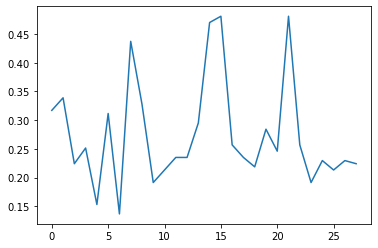

In [123]:
plt.plot(data.Sales[:28])

In [124]:
from statsmodels.graphics.tsaplots import plot_acf

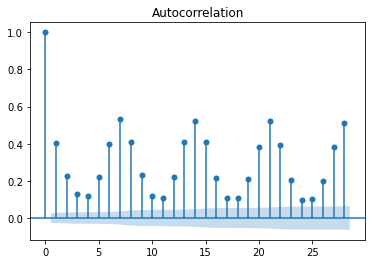

In [125]:
plot_acf(data.Sales, lags=28)
plt.show()

## Node Control

In [126]:
concated_df.Node.value_counts()

34    1753
8      732
37     522
35     439
41     343
38     261
60     237
9      183
52     150
15     145
6      110
42      99
5       95
45      86
44      70
59      70
28      64
29      52
56      46
21      44
53      43
16      38
57      27
20      26
13      21
12      20
26      17
49      15
25      11
22      10
50      10
Name: Node, dtype: int64

In [127]:
concated_df[concated_df["Node"]==6].head()

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node,Sales,new_feature
3982,0.00000000,0.00000000,0.00000000,0.09484117,0.36431227,0.18927233,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,0.19125683,nan
3983,0.00000000,0.00000000,0.00000000,0.09484117,0.36431227,0.18927233,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,0.16393443,0.19125683
3984,0.00000000,0.00000000,0.00000000,0.09484117,0.36431227,0.18927233,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,0.19672131,0.16393443
3985,1.00000000,1.00000000,0.00000000,0.09484117,0.36431227,0.18927233,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,0.32786885,0.19672131
3986,1.00000000,0.00000000,1.00000000,0.09484117,0.36431227,0.18927233,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,0.26229508,0.32786885


In [128]:
concated_df[concated_df["Node"]==9].head()

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node,Sales,new_feature
6,1.00000000,0.00000000,0.00000000,0.32203980,0.42379182,0.28065426,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,9,0.13661202,nan
13,0.00000000,1.00000000,1.00000000,0.26332786,0.37174721,0.24278791,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,9,0.29508197,0.13661202
20,0.00000000,0.00000000,0.00000000,0.26299325,0.37174721,0.24309664,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,9,0.24590164,0.29508197
27,0.00000000,0.00000000,0.00000000,0.26558647,0.37174721,0.24351871,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,9,0.22404372,0.24590164
34,1.00000000,0.00000000,0.00000000,0.27286422,0.37174721,0.24178089,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,9,0.21311475,0.22404372


In [129]:
concated_df[concated_df["Node"]==42].head()

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node,Sales,new_feature
2417,0.00000000,0.00000000,1.00000000,0.82713554,0.75836431,0.72988374,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,0.51366120,nan
2424,0.00000000,0.00000000,0.00000000,0.82992395,0.75836431,0.72577007,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,0.32240437,0.51366120
2438,1.00000000,0.00000000,0.00000000,0.90877828,0.92193309,0.71443455,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,0.47540984,0.32240437
2445,0.00000000,1.00000000,1.00000000,0.90877828,0.92193309,0.71443455,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,0.42622951,0.47540984
2452,0.00000000,0.00000000,0.00000000,0.90877828,0.92193309,0.71443455,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,0.43169399,0.42622951


# General Function

In [130]:
def result_obtain(df, feature_set, name, lag):

    df[name]=feature_set
    
#     train=df[df["date"]<((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
#     test=df[df["date"]>=((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
#     test.reset_index(drop=True, inplace=True)

    train=data[data["date"]<=specific_date]

    test=data[data["date"]>specific_date]
    test.reset_index(drop=True, inplace=True)


    ### Date and Customer Drop

    train=train.drop(["date"], axis=1)
    test=test.drop(["date"], axis=1)

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    train.dropna(inplace=True);
    train.reset_index(drop=True, inplace=True)
    train.index += lag

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    
    
    # Linear Regression-Elastic Net

    elastic_net_function = ElasticNet()

    param_grid_elastic=[
        {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
    ]

    elastic_net_function = GridSearchCV(estimator=elastic_net_function, param_grid=param_grid_elastic,
                     cv=10,return_train_score=True)
    
    elastic_net_function.fit(X_train, y_train)
    

    elastic_predictions=elastic_net_function.predict(X_test)

    res_elastic=performance_list(["Elastic Net Performance Lag " + str(lag)], elastic_predictions, y_test)

    
    
    # Support Vector Machines

    ### Linear

    sv_regressor=LinearSVR()
    

    ### Grid

    param_grid_svm_linear=[
        {"epsilon":[0.5,1,1.5]}
    ]

    sv_regressor_function = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                     cv=10,return_train_score=True)

    sv_regressor_function.fit(X_train, y_train)


    
    sv_regressor_poly=SVR(kernel="poly")
        
    ### Grid

    param_grid_svm_poly=[
        {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
    ]


    sv_regressor_poly_function = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                     cv=10,return_train_score=True)

    sv_regressor_poly_function.fit(X_train, y_train)


    ### Predictions

    svm_predictions_linear=sv_regressor_function.predict(X_test)
    
    svm_predictions_poly=sv_regressor_poly_function.predict(X_test)


    ### Results    

    res_svr_poly=performance_list(["SVR Polynomial Performance Lag " + str(lag)], svm_predictions_poly, y_test)

    res_svr_linear=performance_list(["SVR Linear Performance Lag " + str(lag)], svm_predictions_linear, y_test)

    
    
    
    # Random Forest
    
    ### Grid

    param_grid=[
        {"n_estimators":[200,300,500], "max_features":[8,12,16],
         "bootstrap":[False,True]}
    ]

    random_reg_function=RandomForestRegressor()
    grid_search = GridSearchCV(estimator=random_reg_function, param_grid=param_grid,
                     cv=10,return_train_score=True)

    ### Predictions

    grid_search.fit(X_train, y_train)

    ### Results

    rf_predictions=grid_search.predict(X_test)

    res_rf=performance_list(["Random Forest Performance Lag " + str(lag)], rf_predictions, y_test)
    
    res_df=[res_elastic, res_svr_linear, res_svr_poly, res_rf]

    total_res=pd.concat(res_df)
    
    return total_res

In [131]:
res1=result_obtain(data.copy(), data["Sales"].shift(+1), "lag1", 1)

In [132]:
res1

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance Lag 1,84,0.33010683,0.00000000,-0.30439012,-0.30439012,0.33630022,0.01559867,0.11101500,0.33630022
0,SVR Linear Performance Lag 1,84,0.28419538,0.05107017,-0.51511287,-0.55431940,0.57550527,0.01966542,0.15399794,0.54187349
0,SVR Polynomial Performance Lag 1,84,0.37828913,0.04493198,-0.13825128,-0.13996477,0.21472412,0.01132279,0.08112598,0.21445497
0,Random Forest Performance Lag 1,84,0.39251627,0.06292422,-0.09699423,-0.10322704,0.18796969,0.01031401,0.07240187,0.18445571


In [133]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,84,0.33010683,0.00000000,-0.30439012,-0.30439012,0.33630022,0.01559867,0.11101500,0.33630022
1,Support Vector Regressor Linear Performance,84,0.28419908,0.05107036,-0.51509315,-0.55429816,0.57548589,0.01966509,0.15399497,0.54185596
2,Support Vector Regressor Polynomial Performance,84,0.37828913,0.04493198,-0.13825128,-0.13996477,0.21472412,0.01132279,0.08112598,0.21445497
3,Random Forest Performance,84,0.39135953,0.06473736,-0.10023661,-0.10738916,0.18967113,0.01037278,0.07264063,0.18561100
4,Elastic Net Performance with Feature Extraction,84,0.32997147,0.00000000,-0.30492518,-0.30492518,0.33668233,0.01560905,0.11109556,0.33668233
5,SVR Linear Performance with Feature Extraction,84,0.28827899,0.05090403,-0.49365060,-0.52944647,0.55184132,0.01923961,0.15036342,0.52158994
6,SVR Polynomail Performance with Feature Extrac...,84,0.37822180,0.04512636,-0.13845388,-0.13965860,0.21309591,0.01123106,0.08054042,0.21294494
7,Random Forest Performance with Feature Extraction,84,0.38913137,0.05615629,-0.10653654,-0.10654231,0.17716641,0.00987470,0.06860534,0.17630381
